In [1]:
import scipy as sci
import math
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

# De Solla Price Graph w/ Krapivsky & Redner Adjustment

####  by Ryan Bergner (2022)


The power-law distribution, described by De Solla Price, is a phenomenon that occurs in Random Graphs 
with preferential attachment. Certain nodes which have a high in-degree (referred to as references in the paper) 
have a higher probability of receiving a connection from a new node than an existing node with a lower degree. 
This essentially describes "the rich getting richer" or popular nodes becoming more popular - with has been 
observed as a phenomenon and used in algorithms for things such as social networks in which a few number of 
popular users are more likely to receive friend requests than an unpopular user. This resulted in the discovery of 
the cumulative advantage distribution, witch was shown in the second resource to be an RV ~ *Beta(n,m+2)*.

In [2]:
COLOR1 = '#f44560'
COLOR2 = '#730517'

## Define Variables and Initial Functions

In [6]:
#@numba.jit(nogil=True)
def deg_distribution(graph, scale='lin', colour='#ff0080', alpha = .8 , fit_line = False, expct_lo=1, expct_hi=8, expct_const=1):
    
    plt.close()
    num_nodes = graph.number_of_nodes()
    max_degree = 0
    
    
    for n in graph.nodes():
        
        if graph.degree(n) > max_degree:
            max_degree = graph.degree(n) # Find the maximum degree 
    
  

    D = []
    d_temp = []
    
   
    for i in range(max_degree + 1):
        D.append(i)
        d_temp.append(0)
        for n in graph.nodes():
            if graph.degree(n) == i:
                d_temp[i] += 1
        y = [i / num_nodes for i in d_temp] 
    
   
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Degree distribution (log-log scale)')
    plt.ylabel('log(P(k))')
    plt.xlabel('log(k)')
    plt.plot(D, y, linewidth = 0, marker = 'o', markersize = 8, color = colour, alpha = alpha)

    if fit_line:
        # Add theoretical distribution line k^-3
        # Note that you need to parametrize it manually
        w = [a for a in range(expct_lo,expct_hi)]
        z = []
        for i in w:
            D = (i**-3) * expct_const   # set line's length and fit intercept; we expect most papers to be cited once
            z.append(D)

        plt.plot(w, z, color = '#ff2fa9')
            
 
            
    else:
        plt.plot(D, y, linewidth = 0, marker = 'o', markersize = 8, color = '#ff2fa9', alpha = alpha)
        plt.title('Degree distribution (linear scale)')
        plt.ylabel('P(k)')
        plt.xlabel('k')

        
    plt.show()


#-----------

a = 3
c = 5
#n = 100
#starting_node = 1


#----------
# Generate nodes systematically based on ki



#@numba.jit(nogil=True)
def rand_prob_node():
    
    nodes_probs = []
    
    for node in G.nodes():
        node_degr = G.degree(node)
        node_proba = node_degr / (2 * len(G.edges()))
        nodes_probs.append(node_proba)   
    random_probability_node = np.random.choice(G.nodes(),p=nodes_probs)
    
    return random_probability_node



#----------

'''
@numba.jit(nogil=True)
def select_neighbors(limits, num_neighbors):
    
    neighbors = []
    
    already_neighbor = False
    
    i = 0
    
    while i < num_neighbors:
        R = np.random.random() # random number between 0 and 1
        # compare the random number to the limits and add node accordingly
        for j in range(len(limits) - 1):
            if R >= limits[j] and R < limits[j+1]:
                # if j is already a neighbor
                if j in neighbors:
                    
                    already_neighbor = True # dont connect
                    
                else:
                    
                    neighbors.append(j) # connect uniformily to all j 
       
        if already_neighbor == True:
            
            already_neighbor = False
            i -= 1 # Go back, did not contribute to degree sum
        i+=1
        
    return neighbors  #generates the list used to create edges
'''

#----------
#@numba.jit(nogil=True)
def add_edge():
    if len(G.edges()) == 0:
        random_probability_node = 0
    else:
        random_probability_node = rand_prob_node()
    new_edge = (random_probability_node, new_node)
    if new_edge in G.edges():
        print("NO NODE TO CONNECT TO")
        add_edge()
    else:
        print("CONNECTING")
        G.add_edge(new_node, random_probability_node)
        print("Edge added: {} {}".format(new_node + 1, random_probability_node))


##  Algorithm

In [7]:
print("***\nWelcome to De Solla Price model simulation\nAuthor: Ryan Bergner (2022)\n\n")

init_nodes = 5
final_nodes = 700
m_parameter = 3

print("\n")
print("INITIALIZING GRAPH...")
print("\n")

#------------------------------------------------------------------------------------

G = nx.complete_graph(init_nodes)


count = 0
new_node = init_nodes


for f in range(final_nodes - init_nodes):
    
    G.add_node(init_nodes + count)
    count += 1
    for e in range(0, m_parameter):
        add_edge()
    new_node += 1


print("\nFinal Graph of ({}) nodes reached".format(len(G.nodes())))

***
Welcome to De Solla Price model simulation
Author: Ryan Bergner (2022)




INITIALIZING GRAPH...


CONNECTING
Edge added: 6 0
CONNECTING
Edge added: 6 2
CONNECTING
Edge added: 6 1
CONNECTING
Edge added: 7 4
CONNECTING
Edge added: 7 2
CONNECTING
Edge added: 7 3
CONNECTING
Edge added: 8 1
CONNECTING
Edge added: 8 7
CONNECTING
Edge added: 8 4
CONNECTING
Edge added: 9 0
NO NODE TO CONNECT TO
CONNECTING
Edge added: 9 4
CONNECTING
Edge added: 9 8
CONNECTING
Edge added: 10 0
CONNECTING
Edge added: 10 6
CONNECTING
Edge added: 10 4
CONNECTING
Edge added: 11 5
NO NODE TO CONNECT TO
CONNECTING
Edge added: 11 10
CONNECTING
Edge added: 11 4
CONNECTING
Edge added: 12 4
NO NODE TO CONNECT TO
CONNECTING
Edge added: 12 9
CONNECTING
Edge added: 12 2
CONNECTING
Edge added: 13 4
CONNECTING
Edge added: 13 2
NO NODE TO CONNECT TO
CONNECTING
Edge added: 13 7
CONNECTING
Edge added: 14 9
CONNECTING
Edge added: 14 0
CONNECTING
Edge added: 14 2
CONNECTING
Edge added: 15 12
CONNECTING
Edge added: 15 0
CONNECT

## Plot

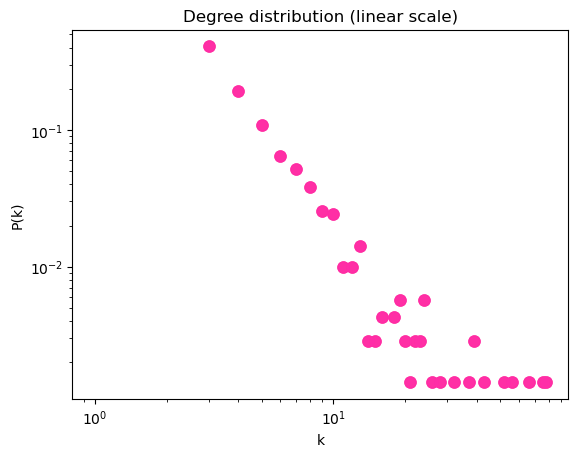

In [8]:
deg_distribution(G)

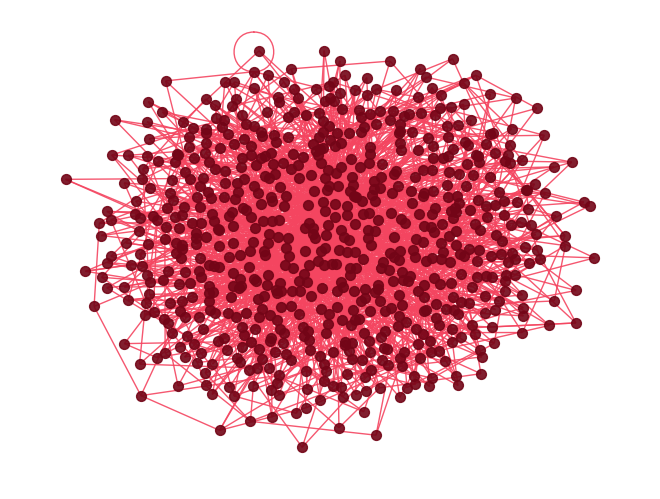

In [9]:
# Plot the network

nx.draw(G, alpha = .9, edge_color = COLOR1, node_color = COLOR2, node_size=50)

(array([66.,  4.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.]),
 array([  0.   ,   3.575,   7.15 ,  10.725,  14.3  ,  17.875,  21.45 ,
         25.025,  28.6  ,  32.175,  35.75 ,  39.325,  42.9  ,  46.475,
         50.05 ,  53.625,  57.2  ,  60.775,  64.35 ,  67.925,  71.5  ,
         75.075,  78.65 ,  82.225,  85.8  ,  89.375,  92.95 ,  96.525,
        100.1  , 103.675, 107.25 , 110.825, 114.4  , 117.975, 121.55 ,
        125.125, 128.7  , 132.275, 135.85 , 139.425, 143.   , 146.575,
        150.15 , 153.725, 157.3  , 160.875, 164.45 , 168.025, 171.6  ,
        175.175, 178.75 , 182.325, 185.9  , 1

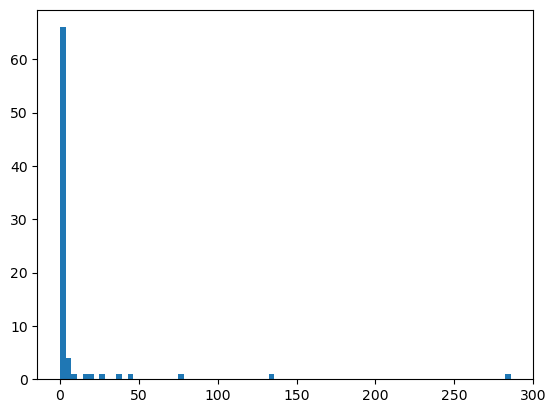

In [11]:
nbins = len(nx.degree_histogram(G))

plt.hist(nx.degree_histogram(G), bins = 80)

In [ ]:
def price(g, n, m0): # initial size of graph is 1
    
    m = m0 - 1

    for i in range(m0 + 1, n + 1):
        
        g.add_node(i)
        degrees = nx.degree(g)
        node_prob = {}

        s = 0
        
        
        for j in degrees:
            
            s += j[1] # set s to be the sum of k-degree nodes 


        for each in g.nodes():
            node_prob[each] = (float)(degrees[each]) / s   #calculate p for each iter. (c and a cancel out to 1)
            

        D = [] # cumulative node prob at each k [i.e. in-degree distribution]
        prev = 0
        

        for n, p in node_prob.items():
            
            temp = [n, prev + p]
            D.append(temp)
            prev += p
            

        I = [] # list of new edges not to be repeated
        num_edges_added = 0
        target_nodes = []
        
        
        

        while (num_edges_added < m):
            
            prev_cum = 0
            r = random.random()
            k = 0
            
            while (not (r > prev_cum and r <= D[k][1])):
                prev_cum = D[k][1]
                k = k + 1
            target_node = D[k][0]
            
            if target_node in target_nodes: # Do not roplace if in edge list
                continue
            
            else:
                    target_nodes.append(target_node)
            g.add_edge(i, target_node)
            num_edges_added += 1
            I.append((i, target_node))


    return g,D,I

In [ ]:
def plot_degree(g):
    
	all_degrees = []
	
	for i in nx.degree(g):
		all_degrees.append(i[1])
	unique_degrees = list(set(all_degrees))
	unique_degrees.sort()
	count_of_degrees = []

	for i in unique_degrees:
		c = all_degrees.count(i)
		count_of_degrees.append(c)

	print(unique_degrees)
	print(count_of_degrees)

	plt.plot(unique_degrees, count_of_degrees, 'ro-')
	plt.xlabel('Degrees')
	plt.ylabel('Number of Nodes')
	plt.title('Degree Distribution')
	plt.show()

In [ ]:
N = 1000
m0 = 2
g = nx.path_graph(m0)
g = price(g, N, m0)
deg_distribution(g)

/var/folders/rv/bh9h3fb53m35w_w3sn_s1fk80000gn/T/ipykernel_91136/3027989374.py:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "deg_distribution" failed type inference due to: non-precise type pyobject
During: typing of argument at /var/folders/rv/bh9h3fb53m35w_w3sn_s1fk80000gn/T/ipykernel_91136/3027989374.py (4)

File "../../../../../../../var/folders/rv/bh9h3fb53m35w_w3sn_s1fk80000gn/T/ipykernel_91136/3027989374.py", line 4:
<source missing, REPL/exec in use?>

  @numba.jit(nogil=True)
/var/folders/rv/bh9h3fb53m35w_w3sn_s1fk80000gn/T/ipykernel_91136/3027989374.py:1: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "deg_distribution" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "../../../../../../../var/folders/rv/bh9h3fb53m35w_w3sn_s1fk80000gn/T/ipykernel_91136/3027989374.py", line 9:
<source missing, REPL/exec i

AttributeError: 'tuple' object has no attribute 'number_of_nodes'

ValueError: too many values to unpack (expected 2)

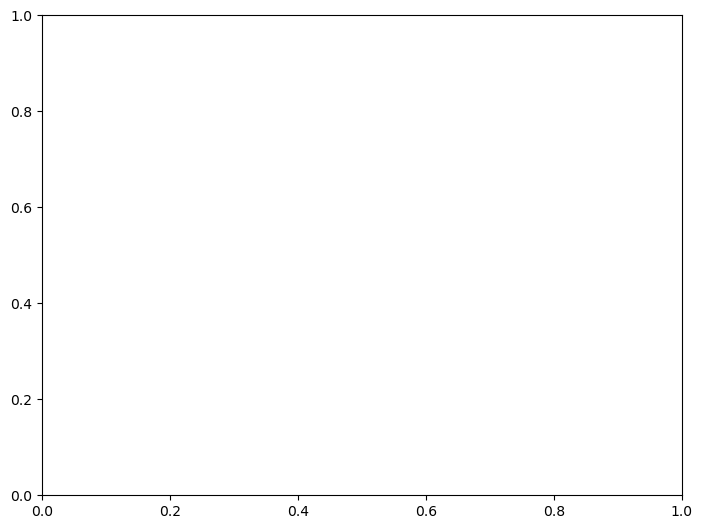

In [ ]:
nx.draw(g, alpha = .8, edge_color = COLOR1, node_color = COLOR2, node_size=50)

In [ ]:
krapivsky = nx.barabasi_albert_graph(100000,1)

# Krapivsky and Redner's adjustment:

The sum of all Nk^2 nodes is ~ 1

In [16]:
def krapivsky(n,a,c):

    G = nx.empty_graph(a)
    
    new_node_set = list(range(c)) # list of existing nodes
    
    repeated_nodes = [] # adding the other n-m nodes. The first node is m.

    source = c
    while source < n:
        # Add edges to m nodes from the source.
        G.add_edges_from(zip([source] * c, new_node_set))
        repeated_nodes.extend(new_node_set)
        repeated_nodes.extend([source] * c)
        new_node_set = G.(repeated_nodes, c) # Pick uniformly from repeated_nodes (preferential attachement)
        source += 1
    return G

In [17]:
krapivsky(1000,3,5)

AttributeError: 'Graph' object has no attribute 'random_subset'

In [ ]:
deg_distribution(g2)

NameError: name 'deg_distribution' is not defined

In [14]:
deg_distribution(g2, alpha = 0.9)

NameError: name 'g2' is not defined

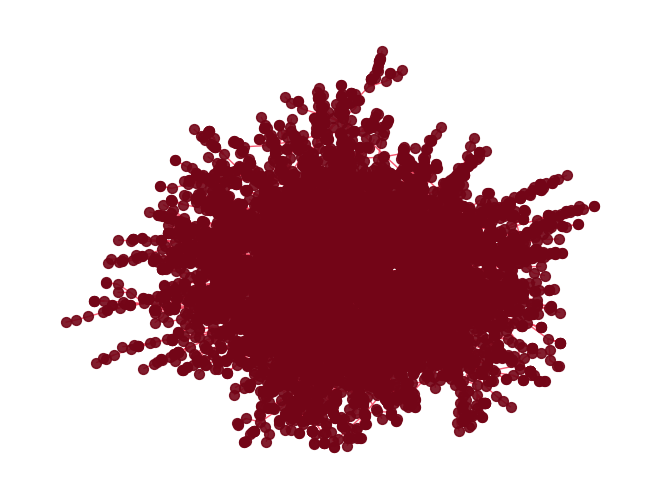

In [15]:
nx.draw(nx.barabasi_albert_graph(10000,1), alpha = .9,edge_color = COLOR1, node_color = COLOR2, node_size=50)